<h1>Обробка та аналіз БМД Лабораторна 7 Яцина Денис БС-82</h1>
<h2>Дисперсійний аналіз</h2>
Завдання:

Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [30]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Розглянемо дані "Продаж спортивних мячів" візьмемо (Баскетбольний, волейбольний та футбольний мячі)

In [43]:
table1 = [59,65,63,68,67,64]
table2=[]
table2 = [53,50,51,48,59,52]
table3=[]
table3 = [45,39,40,46,47,43]

df = pd.DataFrame({
    'Баскетбольні мячі': table1,
    'Волейбольні мячі': table2,
    'Футбольні мячі': table3
}, index=np.arange(1, len(table1)+1))
df.columns.name = 'Спортмагазин'
df.index.name = 'День'
print('Попит на спортивну продукцію в залежності від вибору спорту')
df

Попит на спортивну продукцію в залежності від вибору спорту


Спортмагазин,Баскетбольні мячі,Волейбольні мячі,Футбольні мячі
День,,,
1,59,53,45
2,65,50,39
3,63,51,40
4,68,48,46
5,67,59,47
6,64,52,43


In [45]:

sum1=round((sum(table1)/len(table1)),2)
sum2=round((sum(table2)/len(table2)),2)
sum3=round((sum(table3)/len(table3)),2)

sd1=round((df['Баскетбольні мячі'].std()),2)
sd2=round((df['Волейбольні мячі'].std()),2)
sd3=round((df['Футбольні мячі'].std()),2)
new_df = pd.DataFrame({
    'Баскетбольні мячі': table1,
    'Волейбольні мячі': table2,
    'Футбольні мячі': table3
}, index=np.arange(1, len(table1)+1))
new_df.columns.name = 'Спортмагазин'
new_df.index.name = 'День'
new_df.loc["Середнє:"] = [sum1,sum2,sum3]
new_df.loc["Стандартне відхилення:"] = [sd1,sd2,sd3]
new_df

Спортмагазин,Баскетбольні мячі,Волейбольні мячі,Футбольні мячі
День,,,
1,59.00,53.00,45.00
2,65.00,50.00,39.00
3,63.00,51.00,40.00
4,68.00,48.00,46.00
5,67.00,59.00,47.00
6,64.00,52.00,43.00
Середнє:,64.33,52.17,43.33
Стандартне відхилення:,3.20,3.76,3.27


[]

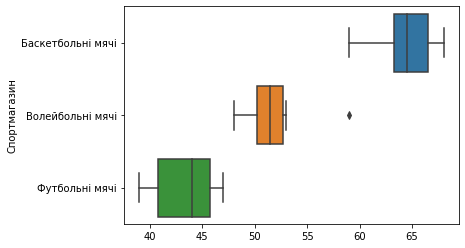

In [46]:
sns.boxplot(data=df, orient='h').set()

In [47]:
def dispersia(inf):
    c = (len(inf.iloc[0,:]))
    Tc=0
    Tc2=0
    for i in range (c):
        Tc=sum(inf.iloc[:,i])
        Tc2+=(Tc)**2
    n=0
    N=0
    for i in range(c):
        n=len(inf.iloc[:,i])
        N+=n
    summ2=0
    T=0
    
    for i in range (c):
        T=sum(inf.iloc[:,i])
        summ2+=T
    summ2=(summ2)**2
    summ1=0
    for i in range (c):
        for j in range(len(inf.iloc[:,i-1])):
            summ1+=(inf.iloc[j][i])**2
                      
    konst=summ2/N
    SSfact=(Tc2/n)-konst
    SSzag=summ1-((summ2)/N)
    SSvip=SSzag-SSfact
    dfact=c-1
    dzag=N-1
    dvip=dzag-dfact
    MSfact=SSfact/dfact
    MSvip=SSvip/dvip
    Femp=MSfact/MSvip
    if((26<(dvip) and (dvip)<= 28)):
        dvip = 26
    elif((28<(dvip) and (dvip)<= 30)):
        dvip = 27
    elif((dvip) > 30 and (dvip) <= 40):
        dvip = 28
    elif((dvip) > 40 and (dvip) <= 60):
        dvip = 29
    elif((dvip) > 60 and (dvip) <= 120):
        dvip = 30
    elif((dvip) > 120):
        dvip = 31
    else:
        dvip = dvip
        
    if(10<n  and n<= 15):
        dfact = 11
    elif(15< n and n<= 20):
        dfact = 12
    elif( 20<n and n<= 30):
        dfact = 13
    elif(n> 30):
        dfact= 14
    else:
        dfact = c - 1
    Fkrit=pd.read_excel(r'C:\Users\User\Desktop\BMD\Lab 8\_Таблиця критичних значень для критерію Фішера.xlsx', encoding='utf-8').iloc[dvip,dfact]  
    if(Femp>=Fkrit):
        result = "Нульова гіпотеза про рівність середніх відхиляється, рівність середніх не підтверджена"
    else:
        result = "Нульова гіпотеза про рівність середніх приймається, рівність середніх підтверджена"
    new__df = pd.DataFrame({
        "Характеристика" : ['Внутрішньогрупова дисперсія ($SS_{факт}$)','Загальногрупова дисперсія ($SS_{заг}$)', 'Випадкова (залишкова) величина $SS_{вип}$',
                           'Kількість ступенів свободи: $d_{факт} = c - 1:$' ,'Kількість ступенів свободи: $d_{заг} = N - 1 :$' , 'Kількість ступенів свободи: $d_{вип}$', '$MS_{факт}: $', '$MS_{вип}: $',
                           'Значення $F_{емпір}$: ','Kритичне значення $F_{крит}$:', "Результат"],
        "Обчислене значення" : [ str(round(SSfact,2)) , str(round(SSzag,2)) ,str(round(SSvip,2)),str(dfact),str(dzag), str(dvip), str(round(MSfact,2)),str(round(MSvip,2)),str(round(Femp,2)), str(Fkrit), result]})
    
    return new__df

In [48]:
dispersia(df)

,Характеристика,Обчислене значення
0,Внутрішньогрупова дисперсія ($SS_{факт}$),1334.11
1,Загальногрупова дисперсія ($SS_{заг}$),1509.61
2,Випадкова (залишкова) величина $SS_{вип}$,175.5
3,Kількість ступенів свободи: $d_{факт} = c - 1:$,2
4,Kількість ступенів свободи: $d_{заг} = N - 1 :$,17
5,Kількість ступенів свободи: $d_{вип}$,15
6,$MS_{факт}: $,667.06
7,$MS_{вип}: $,11.7
8,Значення $F_{емпір}$:,57.01
9,Kритичне значення $F_{крит}$:,3.63


Висновок:

оскільки F емпіричне більше, ніж F критичне, то нульова гіпотеза про рівність середніх відхиляється, рівність середніх теж не підтверджена. Тож, приймаємо альтернативну гіпотезу - середні не всі рівні між собою, тобто принаймні у двох сукупностей середні різняться.

У нашому прикладі альтернативна гіпотеза стверджує, що середні значення обсягів продажів розрізняються не випадково, з  чого випливає, вид спорту впливає на його обсяг збуту